In [2]:
import pandas as pd
from funcoes import *
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams["figure.figsize"] = 16,6
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering

In [3]:
dados = pd.read_csv("medicamentos.csv")
dados.head(10)

name                     substitute0  \
0         augmentin 625 duo tablet  Penciclav 500 mg/125 mg Tablet   
1              azithral 500 tablet         Zithrocare 500mg Tablet   
2                 ascoril ls syrup                 Solvin LS Syrup   
3             allegra 120mg tablet                    Lcfex Tablet   
4                   avil 25 tablet              Eralet 25mg Tablet   
5                 allegra-m tablet              Emlukast-FX Tablet   
6             amoxyclav 625 tablet  Penciclav 500 mg/125 mg Tablet   
7                  azee 500 tablet         Zithrocare 500mg Tablet   
8               atarax 25mg tablet             HD Zine 25mg Tablet   
9  ascoril d plus syrup sugar free                 Arnikof D Syrup   

              substitute1              substitute2              substitute3  \
0  Moxikind-CV 625 Tablet  Moxiforce-CV 625 Tablet       Fightox 625 Tablet   
1         Azax 500 Tablet          Zady 500 Tablet    Cazithro 500mg Tablet   
2       Ambrodil-LX Syrup        Zerotuss XP Syrup           Capex LS Syrup   
3     Etofex 120mg Tablet     Nexofex 120mg Tablet      Fexise 120mg Tablet   
4          Not Applicable           Not Applicable           Not Applicable   
5       LCFEX-Mont Tablet  Fixar 10mg/120mg Tablet       Histakind-M Tablet   
6  Moxikind-CV 625 Tablet  Moxiforce-CV 625 Tablet       Fightox 625 Tablet   
7         Azax 500 Tablet          Zady 500 Tablet    Cazithro 500mg Tablet   
8         Hyzox 25 Tablet        Hizet 25mg Tablet        Hydil 25mg Tablet   
9        Cofsolve-D Syrup            Tucin D Syrup  Akof-D Syrup Sugar Free   

               substitute4  n_substitutes  \
0  Novamox CV 625mg Tablet              5   
1    Trulimax 500mg Tablet              5   
2          Broxum LS Syrup              5   
3     Histafree 120 Tablet              5   
4           Not Applicable              1   
5       Histafree-M Tablet              5   
6  Novamox CV 625mg Tablet              5   
7    Trulimax 500mg Tablet              5   
8       Zyzine 25mg Tablet              5   
9          Krisbro D Syrup              5   

                                                use0 Habit Forming  \
0                  Treatment of Bacterial infections            No   
1                  Treatment of Bacterial infections            No   
2                      Treatment of Cough with mucus            No   
3  Treatment of Sneezing and runny nose due to al...            No   
4                   Treatment of Allergic conditions            No   
5  Treatment of Sneezing and runny nose due to al...            No   
6                  Treatment of Bacterial infections            No   
7                  Treatment of Bacterial infections            No   
8                               Treatment of Anxiety            No   
9                             Treatment of Dry cough            No   

                 Chemical Class Therapeutic Class sideEffect0  n_effects  \
0                    Macrolides   ANTI INFECTIVES    Vomiting          4   
1                    Macrolides   ANTI INFECTIVES    Vomiting          5   
2  Phenylmethylamine Derivative       RESPIRATORY      Nausea         15   
3    Diphenylmethane Derivative       RESPIRATORY    Headache          5   
4         Pyridines Derivatives       RESPIRATORY  Sleepiness          3   
5    Diphenylmethane Derivative       RESPIRATORY      Nausea          9   
6                    Macrolides   ANTI INFECTIVES    Vomiting          4   
7                    Macrolides   ANTI INFECTIVES    Vomiting          5   
8         Piperazine Derivative       RESPIRATORY    Sedation          6   
9    Diphenylmethane Derivative       RESPIRATORY      Nausea          5   

   dosage  
0     625  
1     500  
2       0  
3     120  
4      25  
5       0  
6     625  
7     500  
8      25  
9       0

In [4]:
dados_enc = dados.copy()
for coluna in dados_enc.columns:
    if dados_enc[coluna].dtype=="object":
        dados_enc[coluna] = dados_enc[coluna].astype("category")
        dados_enc[coluna] = dados_enc[coluna].cat.codes

In [5]:
dados_enc.head()

name  substitute0  substitute1  substitute2  substitute3  substitute4  \
0  20493        13470         9459         8239         4343         7280   
1  24074        19091         1359        13858         1823        10658   
2  17902        15829          662        13973         1745         1438   
3   9049         9418         5323         8705         4309         4810   
4  21192         6141        10247         8952         7989         7270   

   n_substitutes  use0  Habit Forming  Chemical Class  Therapeutic Class  \
0              5   447              0             452                  1   
1              5   447              0             452                  1   
2              5   470              0             594                 17   
3              5   631              0             306                 17   
4              1   426              0             694                 17   

   sideEffect0  n_effects  dosage  
0          321          4     625  
1          321          5     500  
2          230         15       0  
3          151          5     120  
4          277          3      25

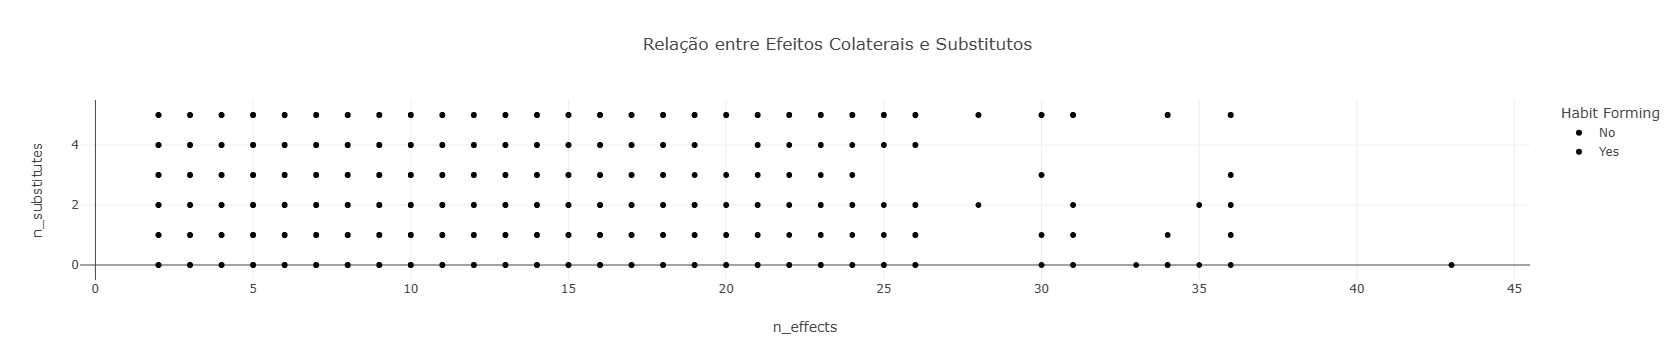

In [7]:
def plot_disp(dados):
    fig_disp = px.scatter(dados, x="n_effects", y="n_substitutes", 
                          title="Relação entre Efeitos Colaterais e Substitutos",
                            color="n_effects")   
    return fig_disp

plot_disp(dados)

<Axes: >

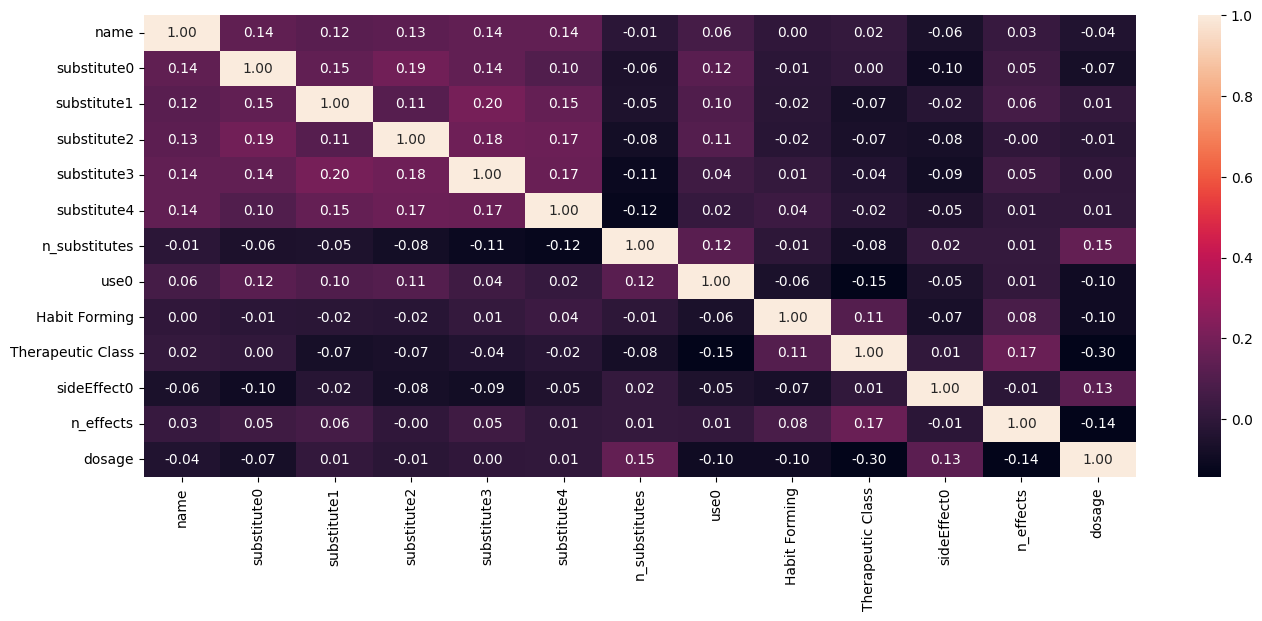

In [16]:
dados_corr = dados_enc.corr(method="spearman")
sns.heatmap(dados_corr, fmt=".2f", annot=True, robust=True)

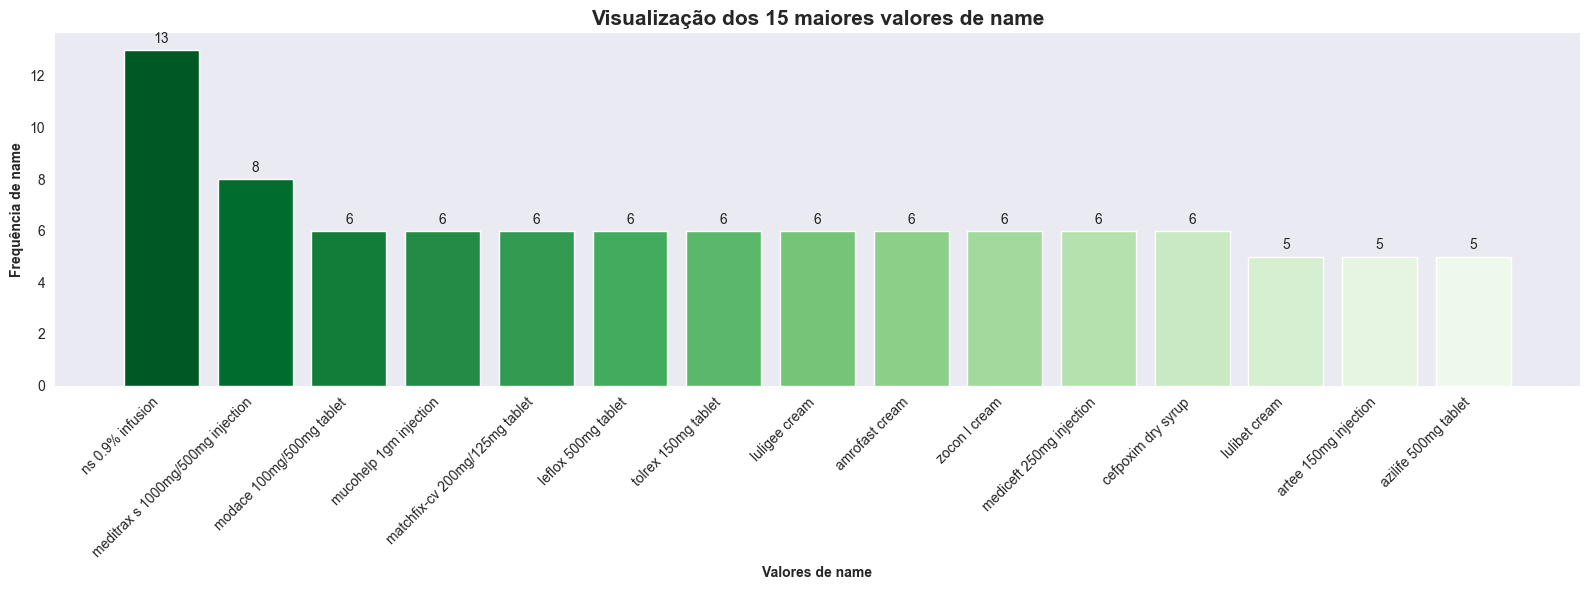

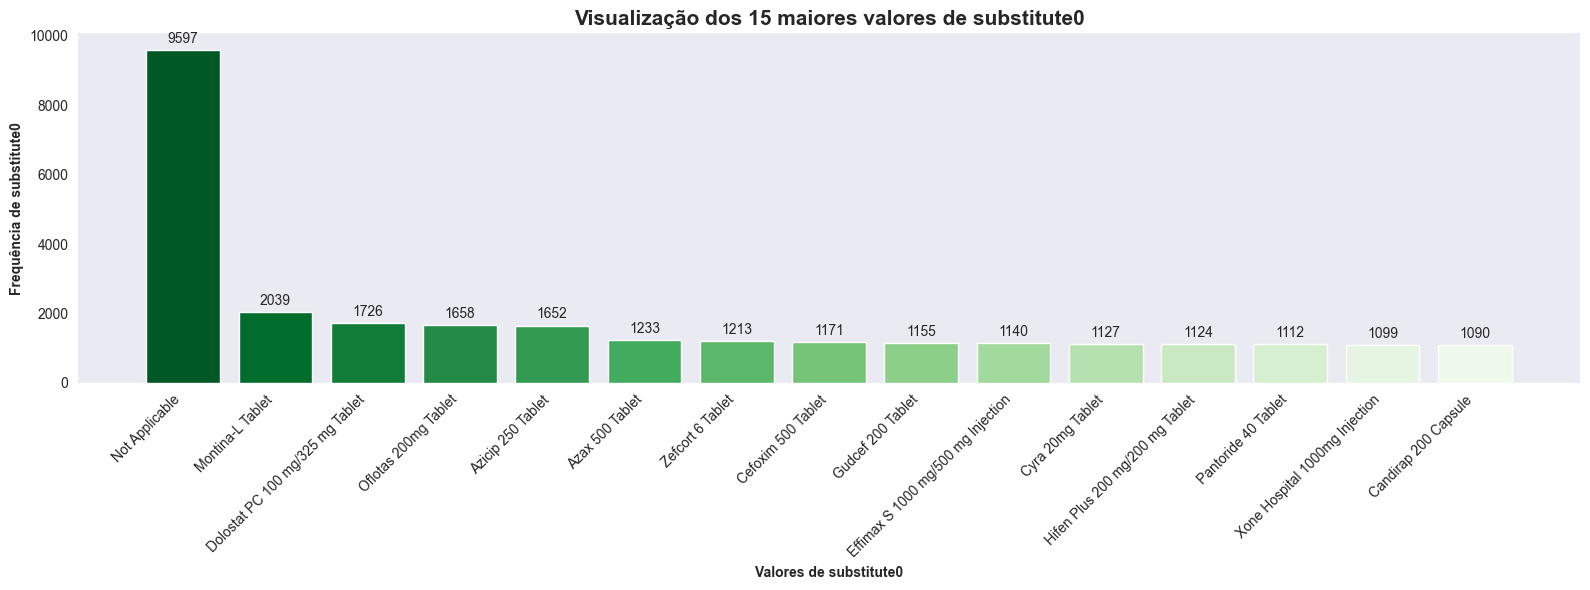

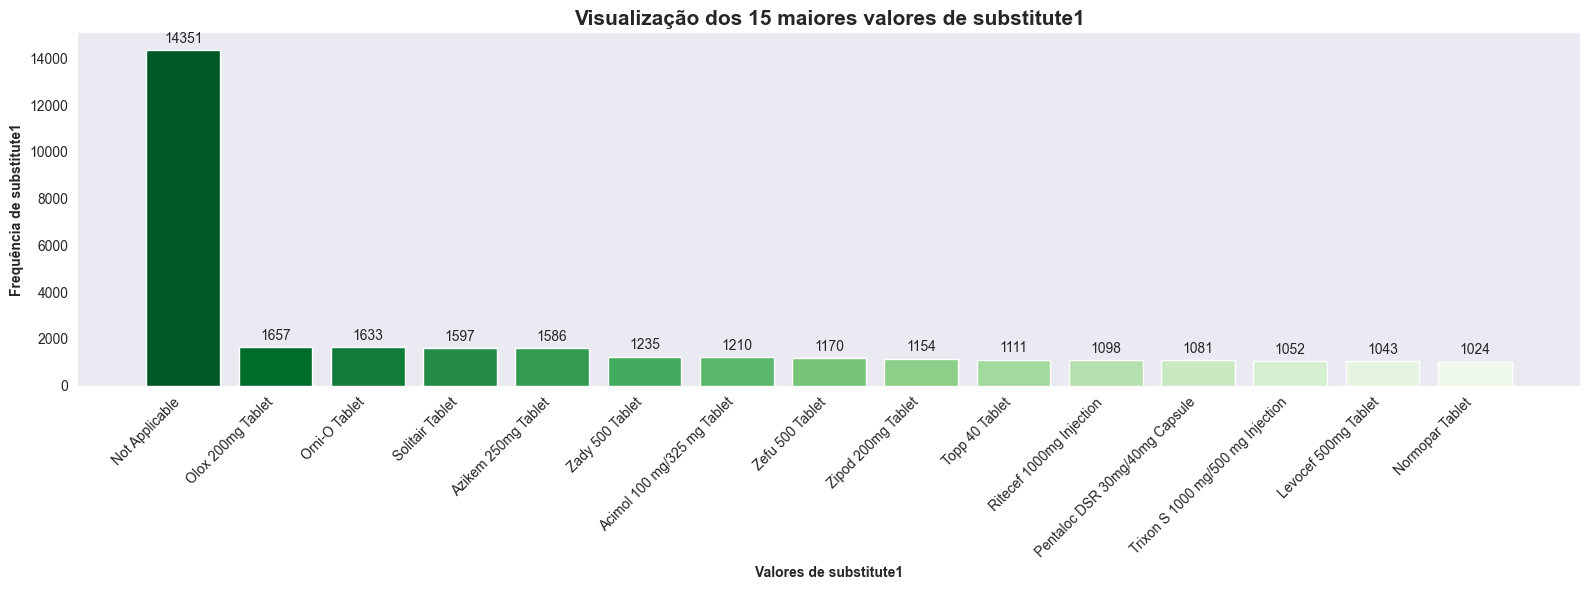

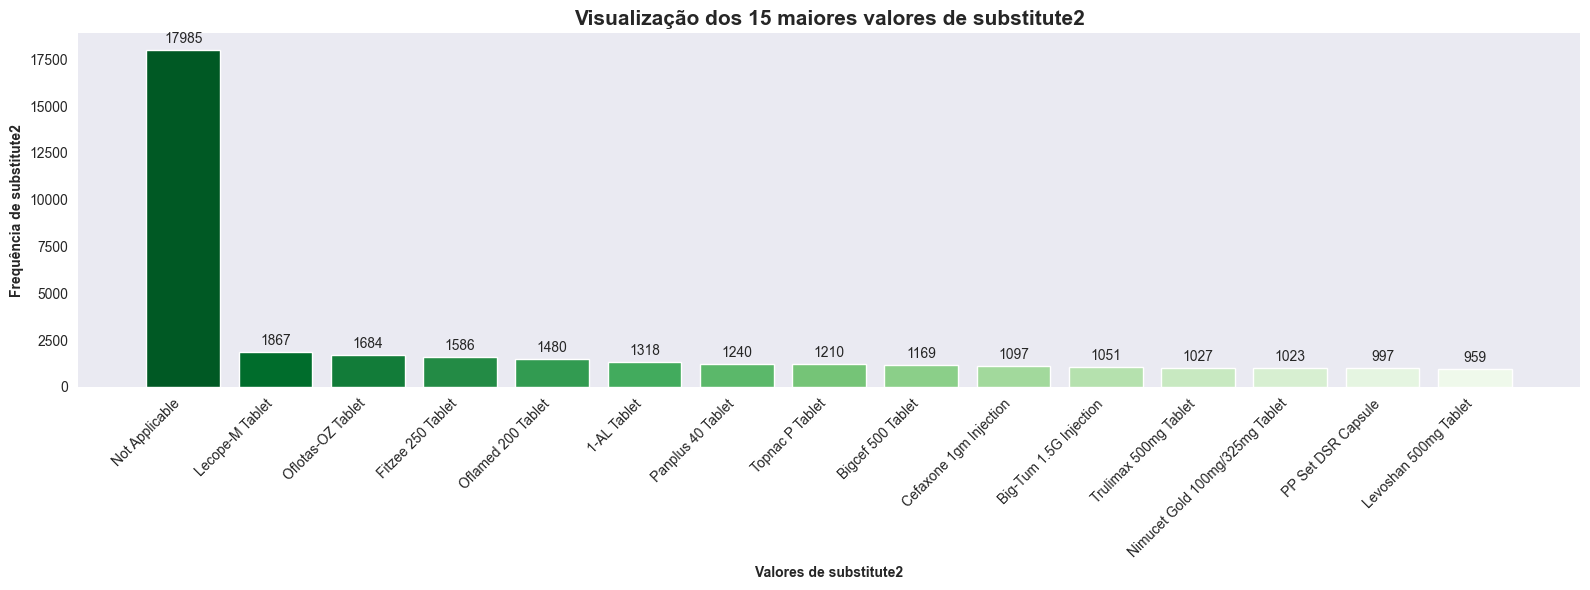

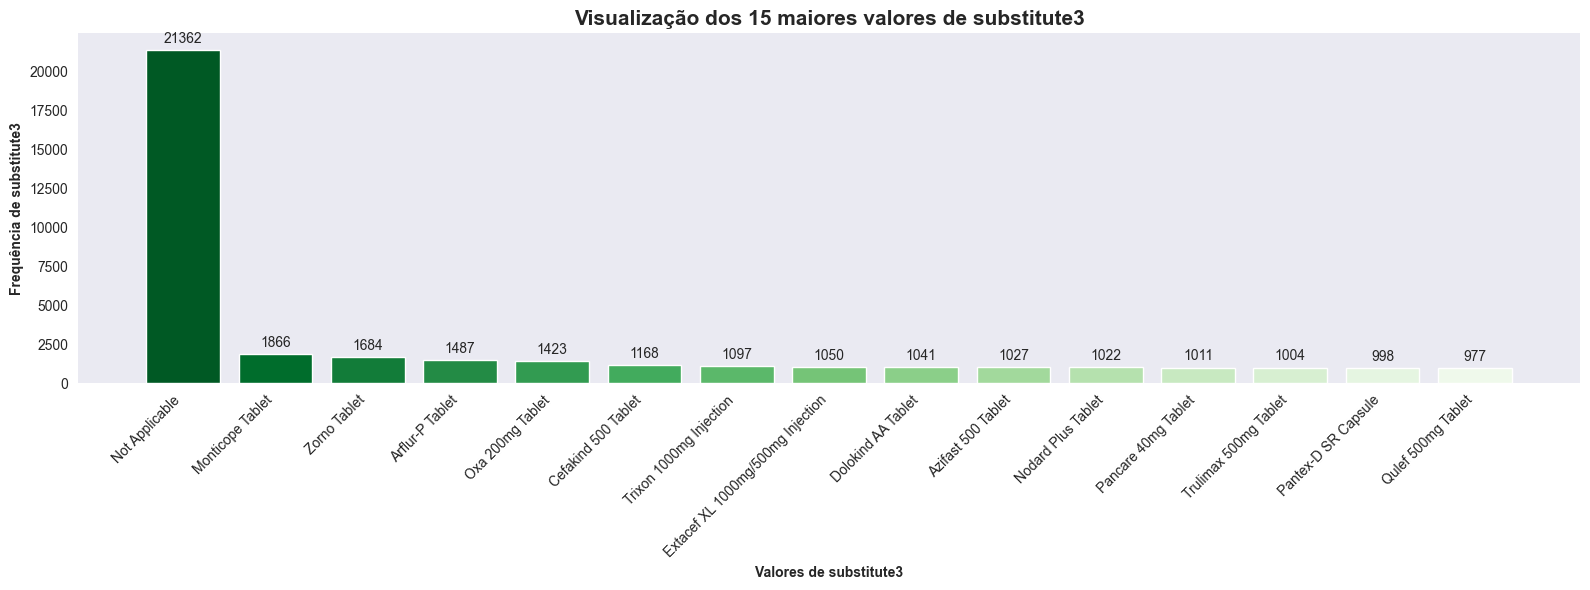

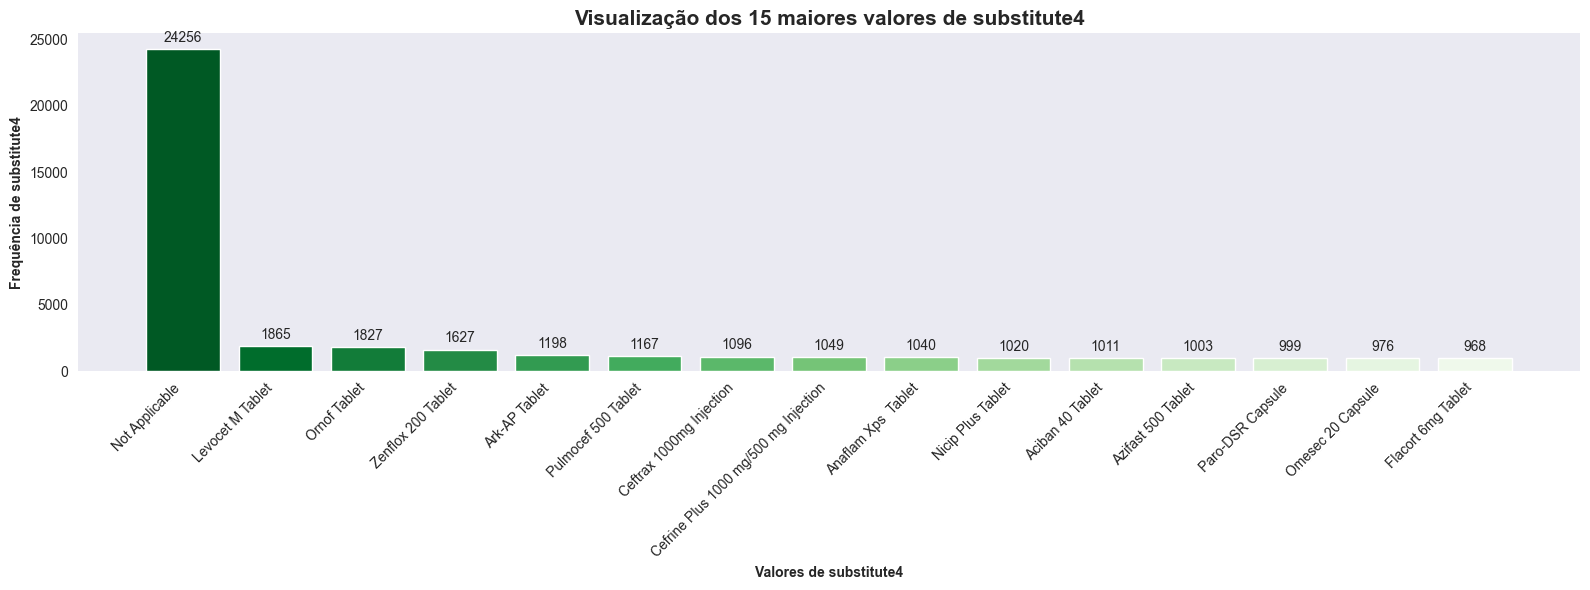

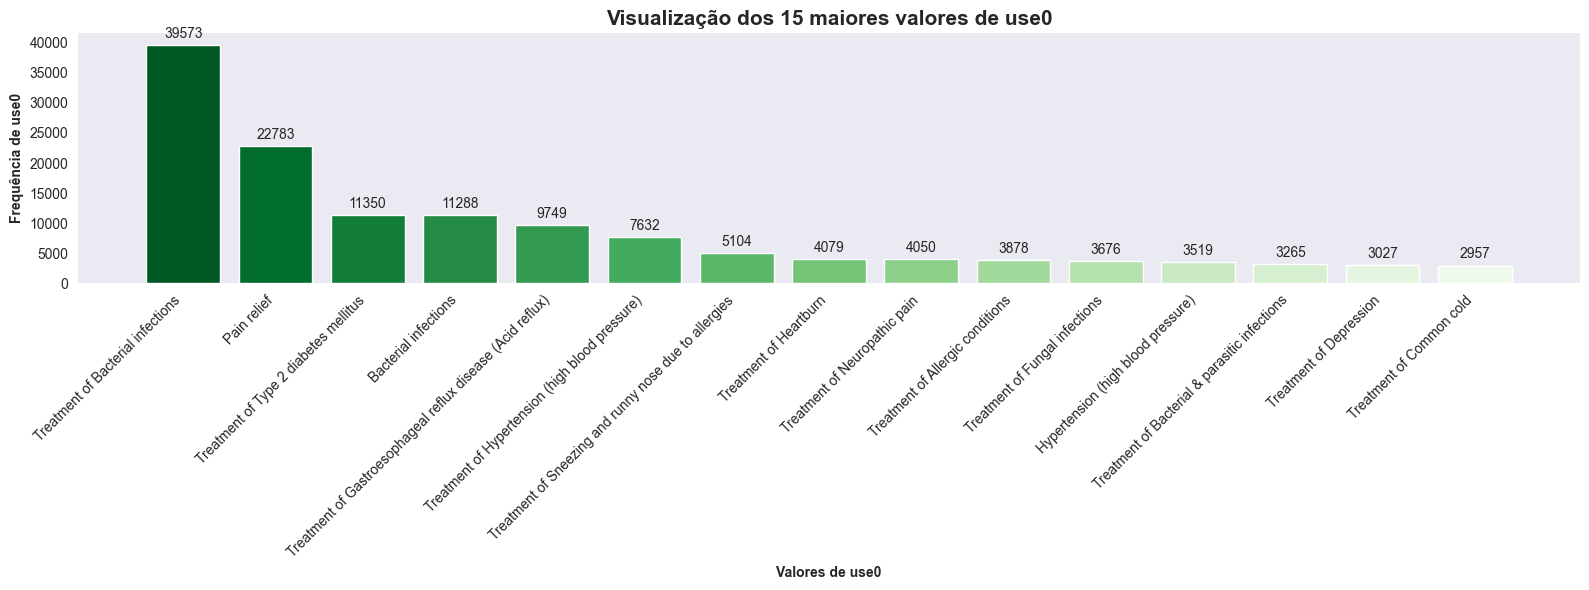

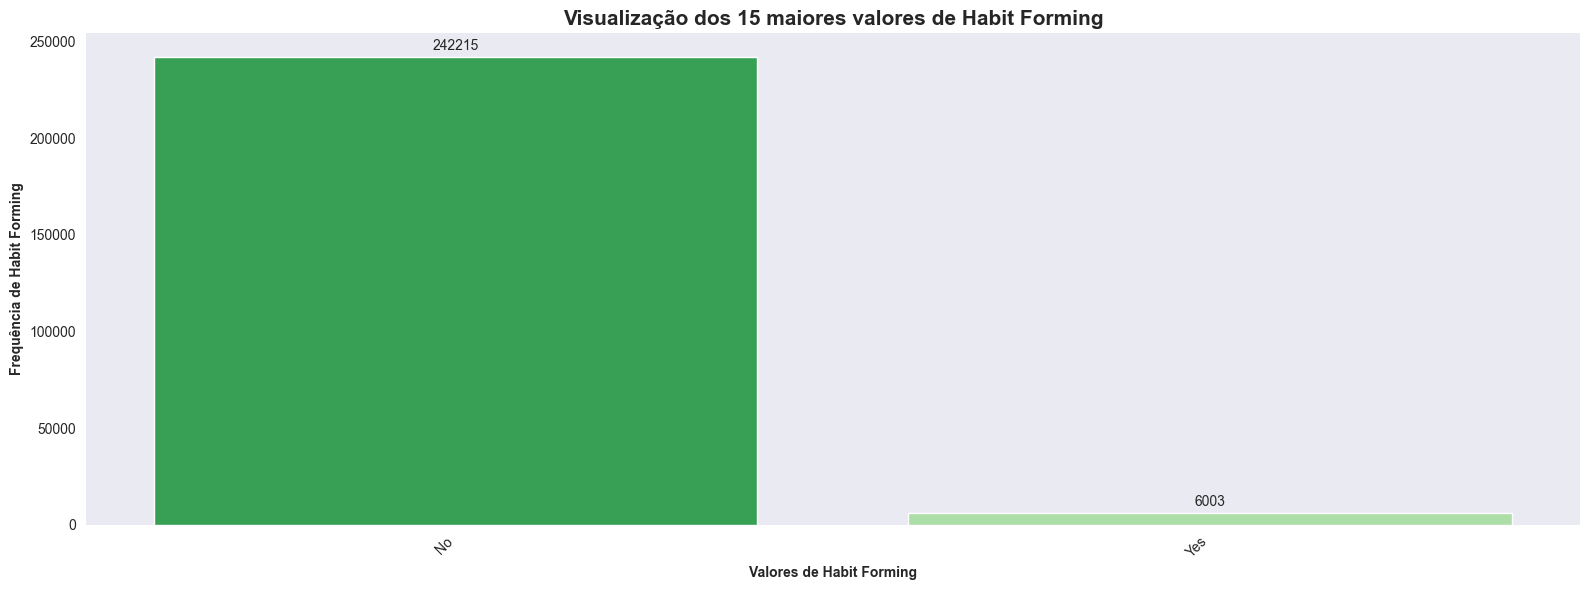

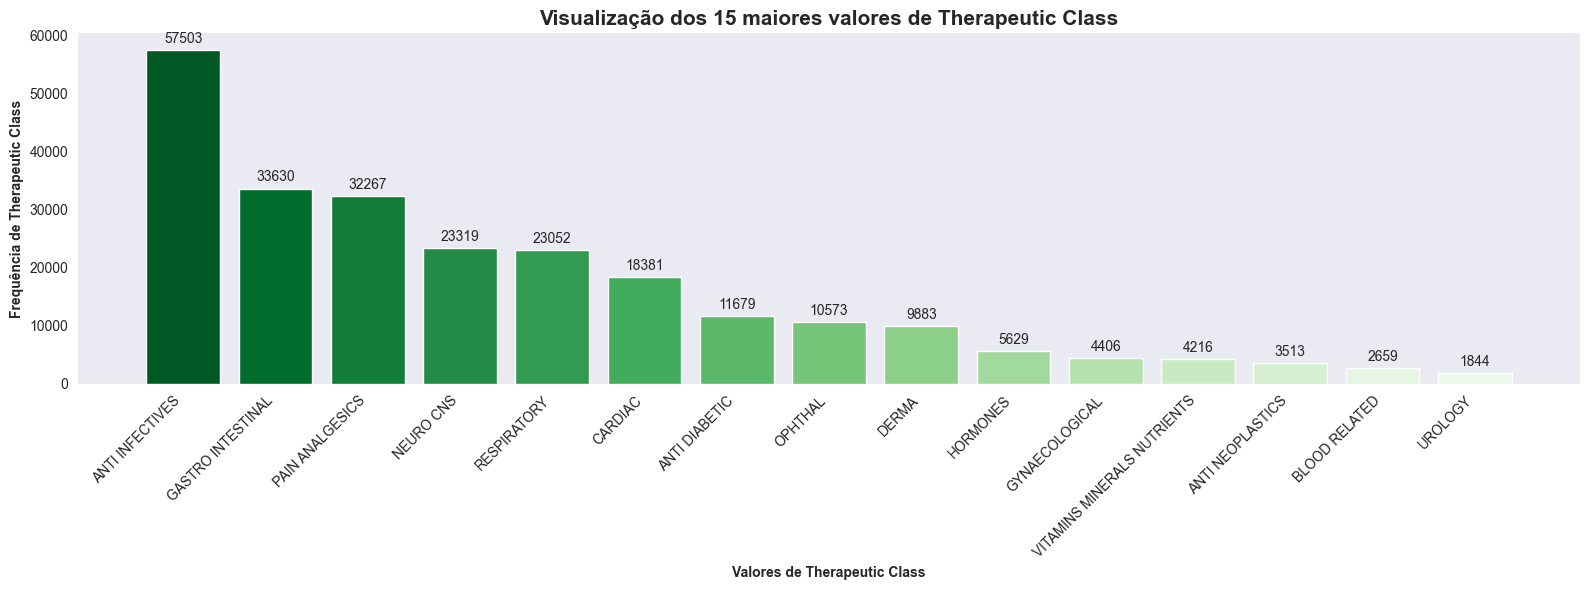

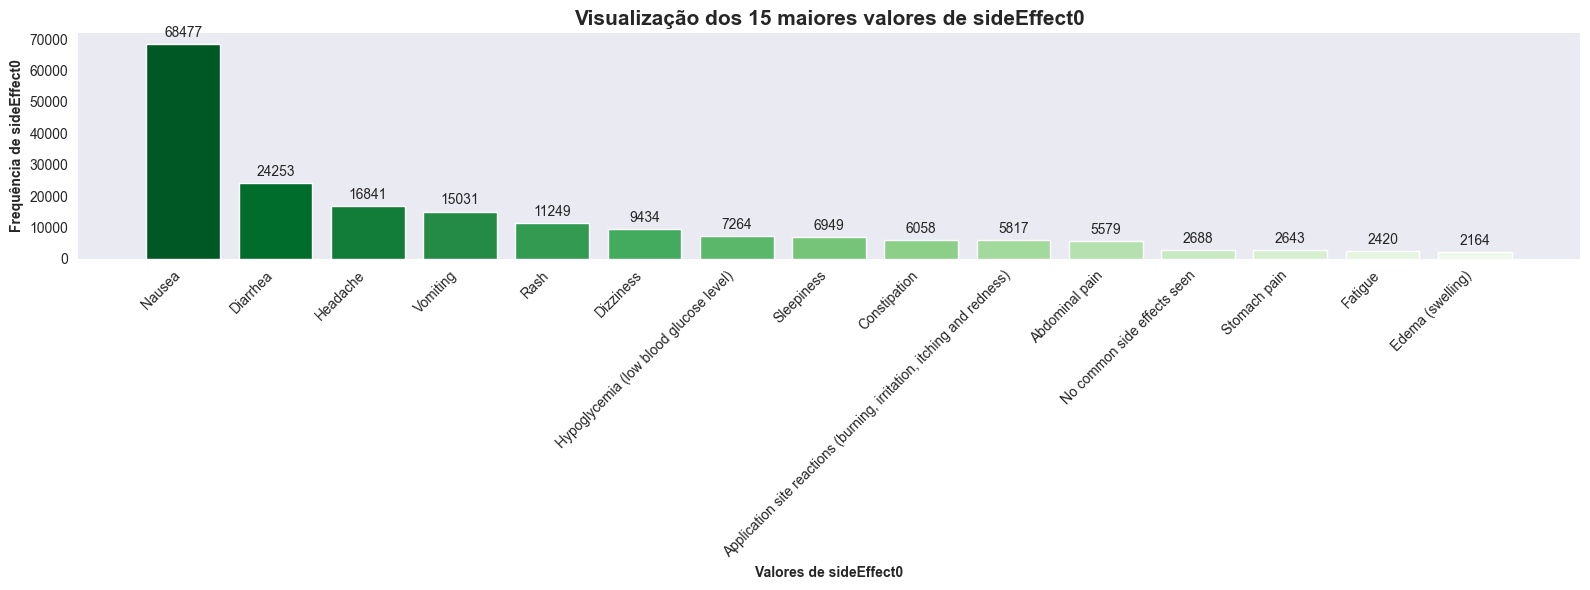

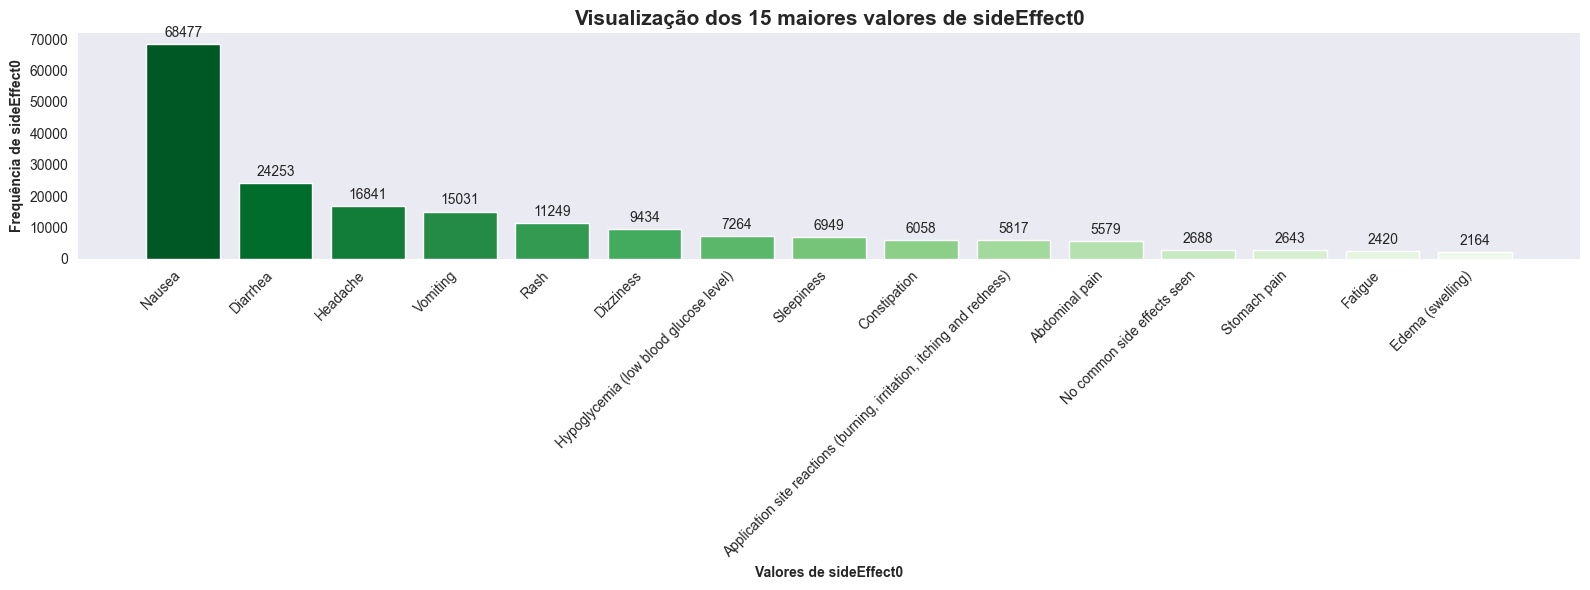

In [18]:
plot_barras(dados, "Greens_r", 15)